In [66]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import TensorBoard
from keras.optimizers import Adam

In [67]:
encoding_dim = 256

input_img = Input(shape = (784,))
dropped = Dropout(0.75)(input_img)
encoded = Dense(encoding_dim, activation = 'relu', name='encoder-layer')(dropped)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [68]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [69]:
autoencoder.compile(optimizer=Adam(lr = 0.001), loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [70]:
autoencoder.fit(x_train, x_train, epochs=200, batch_size=256, shuffle=True, validation_data=(x_test,x_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 83us/step - loss: 0.2189 - val_loss: 0.1381
Epoch 2/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1543 - val_loss: 0.1240
Epoch 3/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.1445 - val_loss: 0.1162
Epoch 4/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1394 - val_loss: 0.1138
Epoch 5/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1359 - val_loss: 0.1121
Epoch 6/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.1332 - val_loss: 0.1109
Epoch 7/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1311 - val_loss: 0.1074
Epoch 8/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1294 - val_loss: 0.1064
Epoch 9/200
60000/60000 [==============================] - 5s 79us/step - loss: 0.1279 - val_loss: 0.1

60000/60000 [==============================] - 5s 79us/step - loss: 0.1165 - val_loss: 0.0950
Epoch 78/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.1165 - val_loss: 0.0951
Epoch 79/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1165 - val_loss: 0.0947
Epoch 80/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1164 - val_loss: 0.0948
Epoch 81/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1164 - val_loss: 0.0949
Epoch 82/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1164 - val_loss: 0.0952
Epoch 83/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1163 - val_loss: 0.0956
Epoch 84/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1164 - val_loss: 0.0948
Epoch 85/200
60000/60000 [==============================] - 5s 80us/step - loss: 0.1163 - val_loss: 0.0949
Epoch 86/200
60000/60000 [========================

60000/60000 [==============================] - 5s 81us/step - loss: 0.1154 - val_loss: 0.0945
Epoch 154/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1154 - val_loss: 0.0946
Epoch 155/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1153 - val_loss: 0.0943
Epoch 156/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1152 - val_loss: 0.0943
Epoch 157/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1153 - val_loss: 0.0941
Epoch 158/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1154 - val_loss: 0.0944
Epoch 159/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.1153 - val_loss: 0.0945
Epoch 160/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1152 - val_loss: 0.0947
Epoch 161/200
60000/60000 [==============================] - 5s 81us/step - loss: 0.1153 - val_loss: 0.0943
Epoch 162/200
60000/60000 [===============

In [71]:
weights,biases = autoencoder.get_layer('encoder-layer').get_weights()
weights = weights.T
weights = weights.T.reshape((len(weights), 28, 28))

pixeled_weights = np.heaviside(weights, 0.5)*255

In [72]:
encoder_imgs = encoder.predict(x_test)
decoder_imgs = decoder.predict(encoder_imgs)

In [73]:
%matplotlib inline

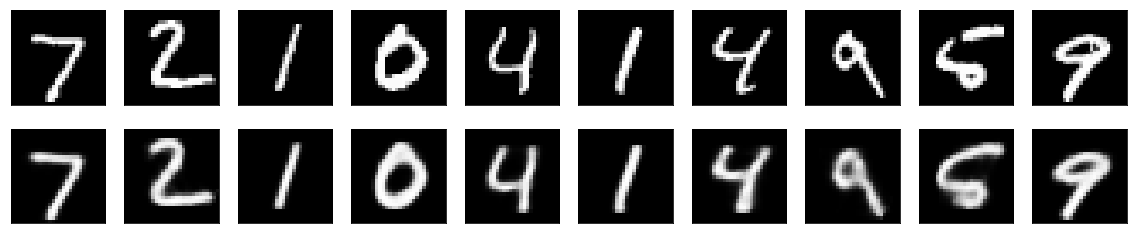

In [74]:
import matplotlib.pyplot as plt

ndim = 10

plt.figure(figsize=(20,4))
for i in range(ndim):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,10,i+11)
    plt.imshow(decoder_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

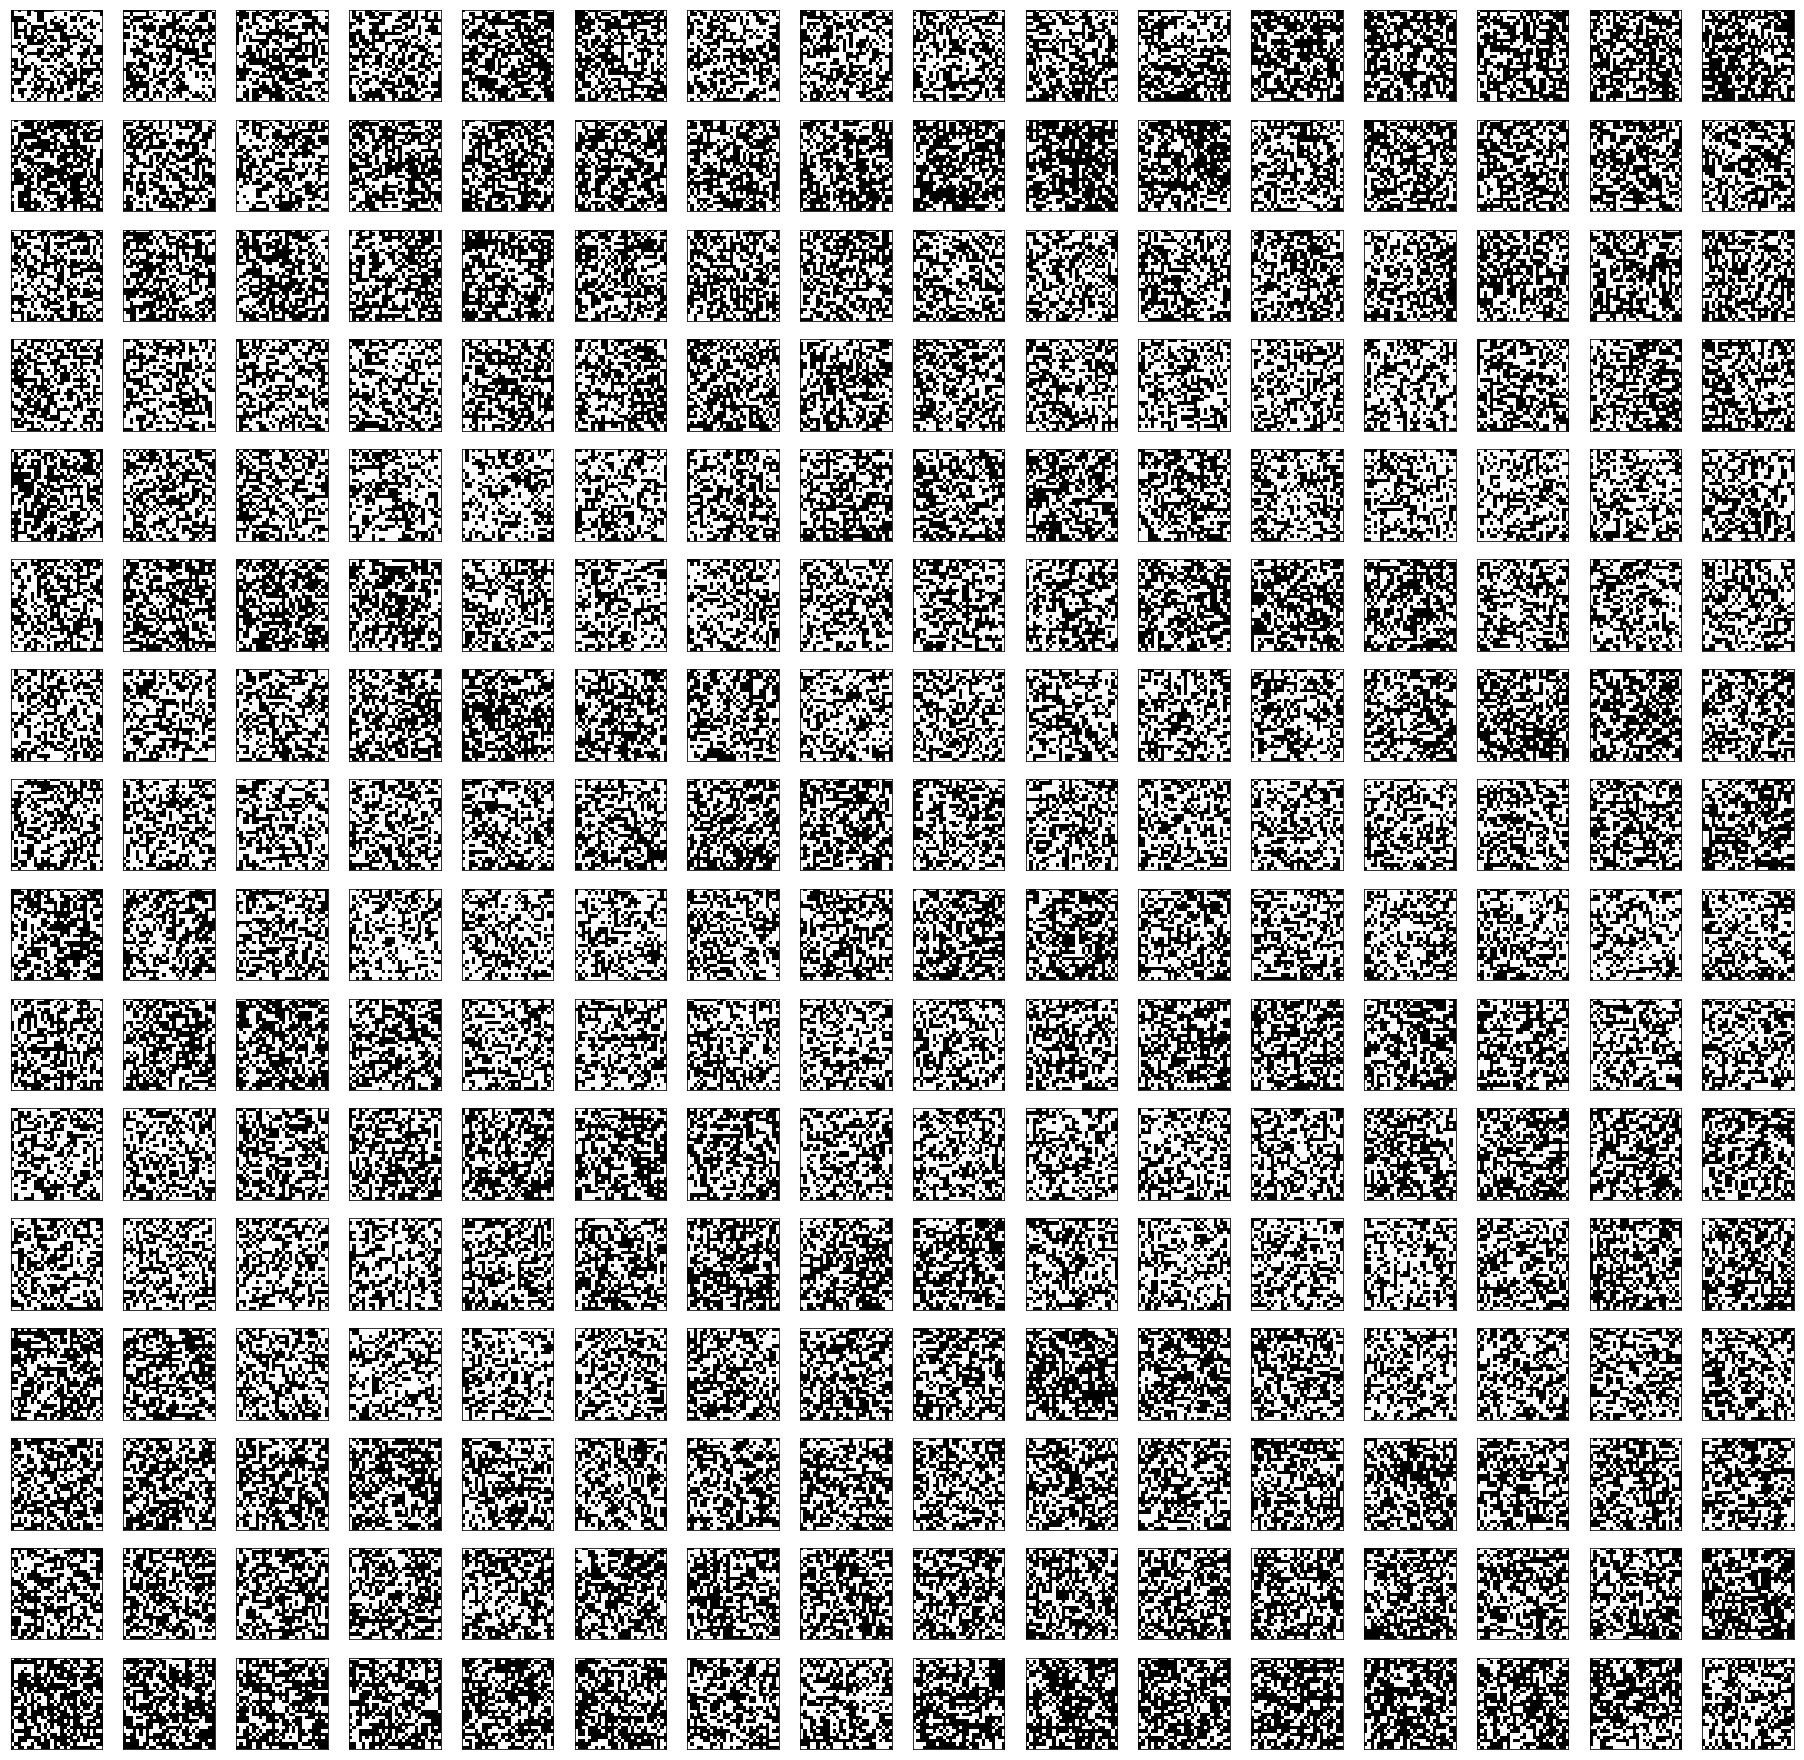

In [75]:
ndim = encoding_dim

plt.figure(figsize=(32,32))
for i in range(ndim):
    ax = plt.subplot(16,16,i+1)
    plt.imshow(pixeled_weights[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()